In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [9]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
print(train.columns.intersection(test.columns))
print(train.columns.difference(test.columns))

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Index(['Item_Outlet_Sales'], dtype='object')


In [14]:
complete_dataset = pd.concat([train,test],axis=0,sort=False)

In [15]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [16]:

complete_dataset['Item_Identifier'].describe()

count     14204
unique     1559
top       FDU15
freq         10
Name: Item_Identifier, dtype: object

In [17]:
complete_dataset['Item_Weight'].describe()


count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [18]:
complete_dataset['Item_Fat_Content'].describe()

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

In [19]:
complete_dataset['Item_Visibility'].describe()


count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [20]:
complete_dataset['Item_Type'].describe()


count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

In [21]:
complete_dataset['Item_MRP'].describe()


count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [22]:
complete_dataset['Outlet_Identifier'].describe()

count      14204
unique        10
top       OUT027
freq        1559
Name: Outlet_Identifier, dtype: object

In [23]:
complete_dataset['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [24]:
complete_dataset['Outlet_Size'].describe()

count      10188
unique         3
top       Medium
freq        4655
Name: Outlet_Size, dtype: object

In [25]:
complete_dataset['Outlet_Location_Type'].describe()

count      14204
unique         3
top       Tier 3
freq        5583
Name: Outlet_Location_Type, dtype: object

In [26]:
complete_dataset['Outlet_Type'].describe()

count                 14204
unique                    4
top       Supermarket Type1
freq                   9294
Name: Outlet_Type, dtype: object

In [27]:
complete_dataset['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [28]:
print(complete_dataset['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [31]:
complete_dataset.loc[(complete_dataset['Outlet_Identifier'])=='OUT010','Outlet_Size'] = 'Small'
complete_dataset.loc[(complete_dataset['Outlet_Identifier'])=='OUT017','Outlet_Size'] = 'Medium'
complete_dataset.loc[(complete_dataset['Outlet_Identifier'])=='OUT045','Outlet_Size'] = 'High'

In [32]:
complete_dataset.groupby(['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']).first().sort_values(by='Outlet_Location_Type')

,,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,,,,,,,,,
OUT019,Tier 1,Grocery Store,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,1985,Small,214.3876
OUT046,Tier 1,Supermarket Type1,FDA03,18.50,Regular,0.045464,Dairy,144.1102,1997,Small,2187.1530
OUT049,Tier 1,Supermarket Type1,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,3735.1380
OUT017,Tier 2,Supermarket Type1,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,2007,Medium,4710.5350
OUT035,Tier 2,Supermarket Type1,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,2004,Small,2748.4224
OUT045,Tier 2,Supermarket Type1,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,2002,High,1076.5986
OUT010,Tier 3,Grocery Store,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,732.3800
OUT013,Tier 3,Supermarket Type1,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,994.7052
OUT018,Tier 3,Supermarket Type2,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,443.4228


In [33]:
display(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))].head(20))
display(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))].tail(20))
len(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5566,FDW47,NaN,LF,0.046151,Breads,123.8414,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5567,FDT51,NaN,Regular,0.010866,Meat,111.4544,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5583,NCG18,NaN,Low Fat,0.040231,Household,101.2332,OUT019,1985,Small,Tier 1,Grocery Store,NaN
5593,FDU22,NaN,Low Fat,0.092845,Snack Foods,116.8124,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5596,FDJ15,NaN,Regular,0.040835,Dairy,185.0608,OUT019,1985,Small,Tier 1,Grocery Store,NaN
5600,FDA07,NaN,Regular,0.054180,Fruits and Vegetables,123.5072,OUT019,1985,Small,Tier 1,Grocery Store,NaN
5609,FDP28,NaN,Regular,0.080250,Frozen Foods,259.4936,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5615,FDF04,NaN,Low Fat,0.013571,Frozen Foods,258.5304,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5625,FDQ44,NaN,Low Fat,0.035965,Fruits and Vegetables,121.1756,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5626,FDL50,NaN,Regular,0.042108,Canned,125.5046,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


2439

In [34]:
item_ids = complete_dataset.groupby("Item_Identifier")["Item_Weight"].mean()
for i in item_ids.index:
    complete_dataset.loc[(complete_dataset["Item_Identifier"]==i) & (complete_dataset["Item_Weight"].isna()),"Item_Weight"] = item_ids[i]

In [35]:
display(complete_dataset[(pd.isnull(complete_dataset['Item_Weight']))])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [36]:
dummy_dataset = pd.get_dummies(complete_dataset,columns=['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Size','Outlet_Type'])
#Converting Low Fat to 0 and Regular to 1
dummy_dataset['Item_Fat_Content'] = dummy_dataset['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [37]:
dummy_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.0,0.016047,249.8092,1999,3735.1380,False,False,False,...,True,False,False,False,True,False,False,True,False,False
1,DRC01,5.92,1.0,0.019278,48.2692,2009,443.4228,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,FDN15,17.50,0.0,0.016760,141.6180,1999,2097.2700,False,False,False,...,True,False,False,False,True,False,False,True,False,False
3,FDX07,19.20,1.0,0.000000,182.0950,1998,732.3800,False,False,False,...,False,False,True,False,False,True,True,False,False,False
4,NCD19,8.93,0.0,0.000000,53.8614,1987,994.7052,False,False,False,...,False,False,True,True,False,False,False,True,False,False


In [38]:

dummy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  14204 non-null  object 
 1   Item_Weight                      14204 non-null  float64
 2   Item_Fat_Content                 13309 non-null  float64
 3   Item_Visibility                  14204 non-null  float64
 4   Item_MRP                         14204 non-null  float64
 5   Outlet_Establishment_Year        14204 non-null  int64  
 6   Item_Outlet_Sales                8523 non-null   float64
 7   Item_Type_Baking Goods           14204 non-null  bool   
 8   Item_Type_Breads                 14204 non-null  bool   
 9   Item_Type_Breakfast              14204 non-null  bool   
 10  Item_Type_Canned                 14204 non-null  bool   
 11  Item_Type_Dairy                  14204 non-null  bool   
 12  Item_Type_Frozen Foods  

In [39]:
dummy_dataset.to_csv('dummy_dataset.csv',index=False)

In [40]:
train_set = dummy_dataset[:8523]
test_set = dummy_dataset[8523:]


In [41]:
train_set.to_csv('trainset.csv')
test_set.to_csv('testset.csv')


In [42]:
train_non_dummy = complete_dataset[:8523]
train_non_dummy.to_csv('train_non_dummy.csv')

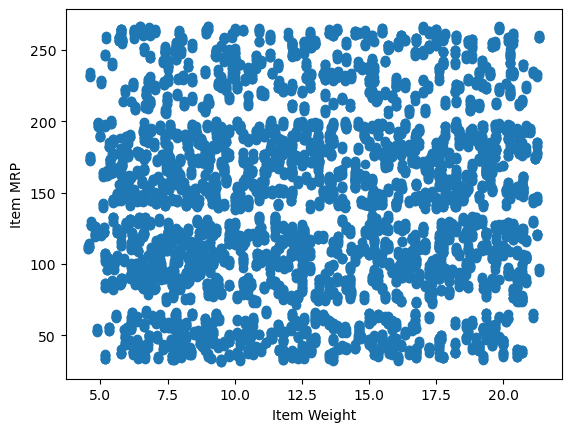

In [43]:
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')
plt.scatter(train_non_dummy['Item_Weight'],train_non_dummy['Item_MRP'])

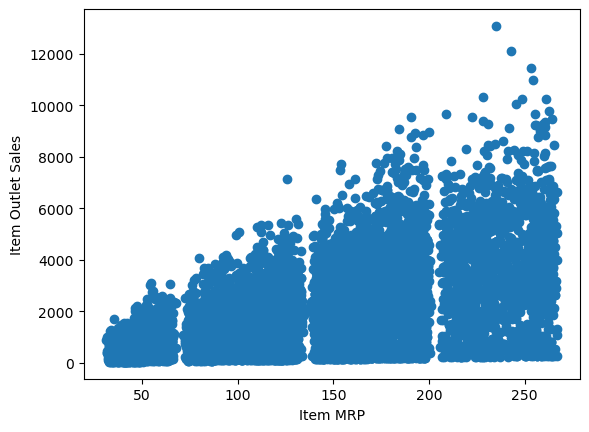

In [44]:
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.scatter(train_non_dummy['Item_MRP'],train_non_dummy['Item_Outlet_Sales'])

(0.0, 0.05)

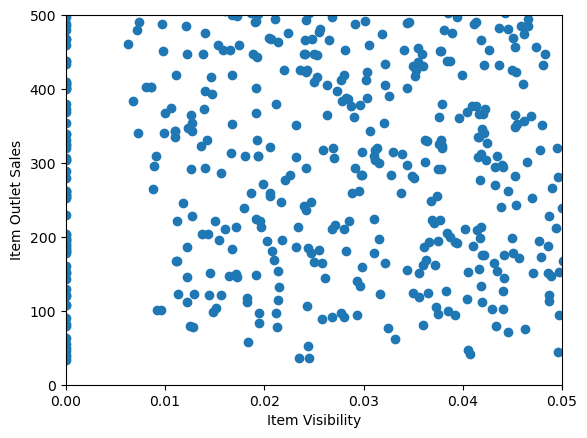

In [45]:
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.scatter(train_non_dummy['Item_Visibility'],train_non_dummy['Item_Outlet_Sales'])
ylim(0,500)
xlim(0,0.05)

In [46]:
train_non_dummy.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].agg(['count','sum','mean'])

,count,sum,mean
Item_Fat_Content,,,
LF,316,6.552424e+05,2073.551928
Low Fat,5089,1.101503e+07,2164.477336
Regular,2889,6.457454e+06,2235.186702
low fat,112,2.338270e+05,2087.740737
reg,117,2.295765e+05,1962.192268


(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

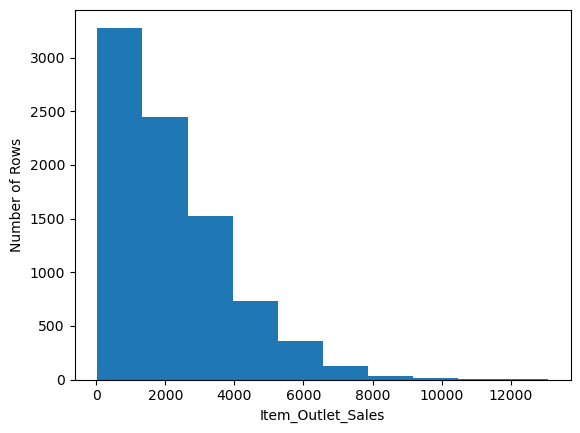

In [47]:
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Number of Rows')
plt.hist(train_non_dummy['Item_Outlet_Sales'])

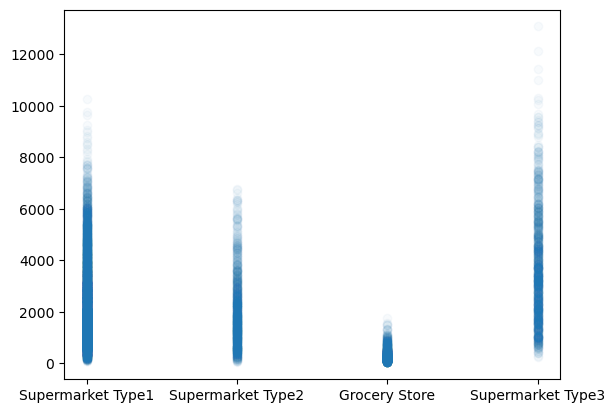

In [48]:
plt.scatter(train_non_dummy['Outlet_Type'],train_non_dummy['Item_Outlet_Sales'],alpha=0.03)
